<a href="https://colab.research.google.com/github/YKochura/ai-lab/blob/main/kmeans/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Реалізація на Python методу K-середніх

K-середніх (K-Means) &mdash; це дуже простий алгоритм кластеризації (кластеризація належить до **неконтрольованого** навчання). Враховуючи фіксовану кількість кластерів та вхідний набір даних, алгоритм намагається розділити дані на кластери таким чином, щоб кластери мали високу подібність внутрішнього класу та низьку подібність між класами.

### Алгоритм

1. Ініціалізуйте центри кластерів, випадковим чином в межах діапазону вхідних даних, або (рекомендовано) деякими методами з існуючих прикладів навчання

2. До збіжності

   2.1. Призначте кожну точку даних найближчому кластеру. Відстань між точкою та центром скупчення вимірюється за допомогою евклідової відстані.

   2.2. Оновіть поточні оцінки центрів кластера, встановивши для них середнє значення всіх екземплярів, що належать до цього кластера  
   
   
### Цільова функція

Основна цільова функція намагається знайти центри кластерів таким чином, що, якщо дані розділені на відповідні кластери, відстань між точками даних та їх найближчими центрами кластера стає якомога меншою.

Враховуючи набір точок даних $ {x_1, ..., x_n} $ і додатнє число $ k $, знайдіть кластери $ C_1, ..., C_k $, які мінімізують

\begin{equation}
J = \sum_{i=1}^n \, \sum_{j=1}^k \, z_{ij} \, || x_i - \mu_j ||_2
\end{equation}

Де:  
- $z_ {ij} \in \{0,1\}$ визначає, чи належить точка даних $ x_i $ до кластеру $ C_j $
- $ \mu_j $ позначає центр кластера $ C_j $
- $ || \,\, || _2 $ позначає евклідову відстань

### Недоліки K-Means
- Кількість кластерів потрібно вказувати на початку
- Результати залежать від початкових центрів кластера
- Чутливий до викидів
- Повільна робота з великими обсягами даних
- ...

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.datasets import make_blobs
np.random.seed(123)

%matplotlib inline

## Набір даних

Shape of dataset: (1000, 2)


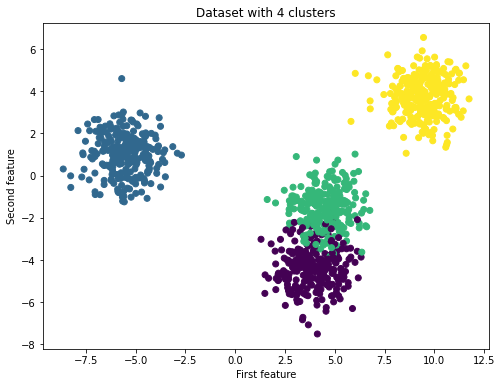

In [17]:
X, y = make_blobs(centers=4, n_samples=1000)
print(f'Shape of dataset: {X.shape}')

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Dataset with 4 clusters")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

## K-Means клас

In [24]:
class KMeans():
    def __init__(self, n_clusters=4):
        self.k = n_clusters

    def fit(self, data):
        """
        Навчання моделі k-середніх на заданому наборі даних
        """
        n_samples, _ = data.shape
        # TODO: Ініціалізація центрів кластерів
        # BEGIN_YOUR_CODE

        # END_YOUR_CODE

        # We will keep track of whether the assignment of data points
        # to the clusters has changed. If it stops changing, we are 
        # done fitting the model
        old_assigns = None
        n_iters = 0

        while True:
            new_assigns = [self.classify(datapoint) for datapoint in data]

            if new_assigns == old_assigns:
                print(f"Навчання закінчено після {n_iters} ітерацій!")
                return

            old_assigns = new_assigns
            n_iters += 1

            # TODO: Обчислити нові центри
            # BEGIN_YOUR_CODE
        
            # END_YOUR_CODE

    def l2_distance(self, datapoint):
        dists = np.sqrt(np.sum((self.centers - datapoint)**2, axis=1))
        return dists

    def classify(self, datapoint):
        """
        Given a datapoint, compute the cluster closest to the
        datapoint. Return the cluster ID of that cluster.
        """
        dists = self.l2_distance(datapoint)
        return np.argmin(dists)

    def plot_clusters(self, data):
        plt.figure(figsize=(12,10))
        plt.title("Initial centers in black, final centers in red")
        plt.scatter(data[:, 0], data[:, 1], marker='.', c=y)
        plt.scatter(self.centers[:, 0], self.centers[:,1], c='r')
        plt.scatter(self.initial_centers[:, 0], self.initial_centers[:,1], c='k')
        plt.show()

## Ініціалізація та навчання моделі

In [25]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

Навчання закінчено після 10 ітерацій!


## Побудова початкового та кінцевого кластерного центру



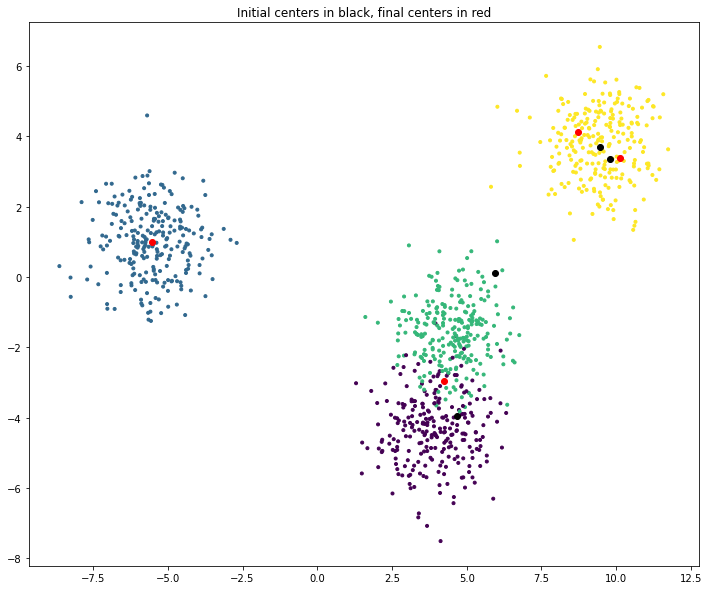

In [26]:
kmeans.plot_clusters(X)